# Sample: display on-sky footprints for dithering data

Footprints of a sample dithering observation are illustrated.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from warpfield.telescope import display_sources, get_subplot, SourceTable

In [2]:
from astropy.coordinates import SkyCoord, Angle
from astropy.time import Time
from astropy.table import QTable, unique
import astropy.units as u

In [3]:
from warpfield.telescope.jasmine import get_jasmine

The sources and telescope pointings are retrieved from the data tables.
Since the `source_table.txt` table contains duplicated sources, the sources are sifted by the `unique()` function on `catalog_id`.

In [4]:
catalog = SourceTable(
    unique(QTable.read('./data/source_table.txt', format='ascii.ipac'), 'source_id'))
pointing = QTable.read('./data/pointing.txt', format='ascii.ipac')

The center of the field of view is defined to illustrate the distribution of the sources. Note that the `mean()` method works only when the pointings do not corss the meridian.

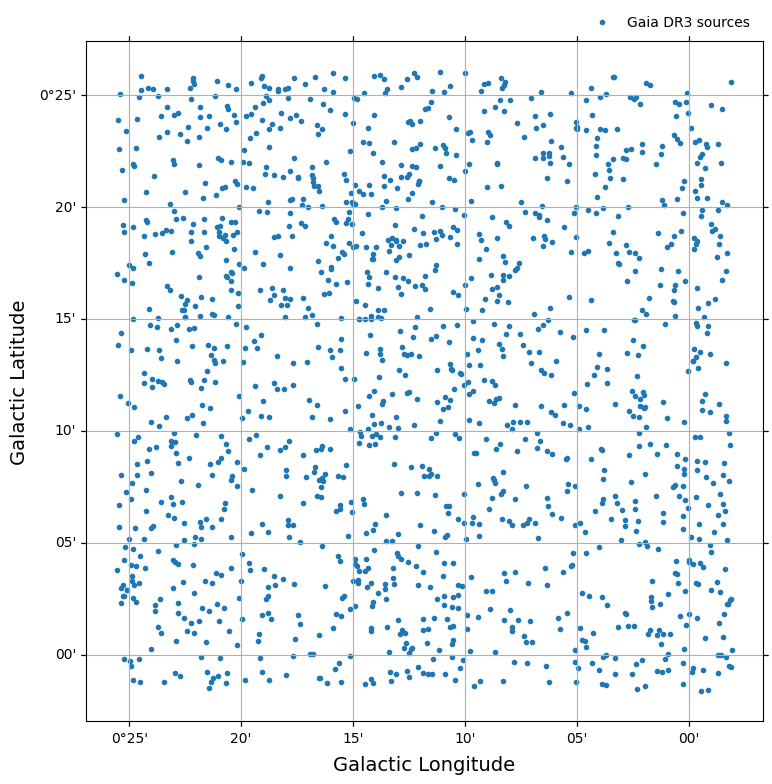

In [5]:
center = pointing.to_pandas().mean()
fov_center = SkyCoord(center.ra*u.deg,center.dec*u.deg).galactic

fig, ax = get_subplot(fov_center)
display_sources(ax, catalog, marker='.', title='Gaia DR3 sources')

Construct the `telescope` instances from the pointing table.
The `overlay_footprints()` method illustrates the telescope footprint on the given axis.

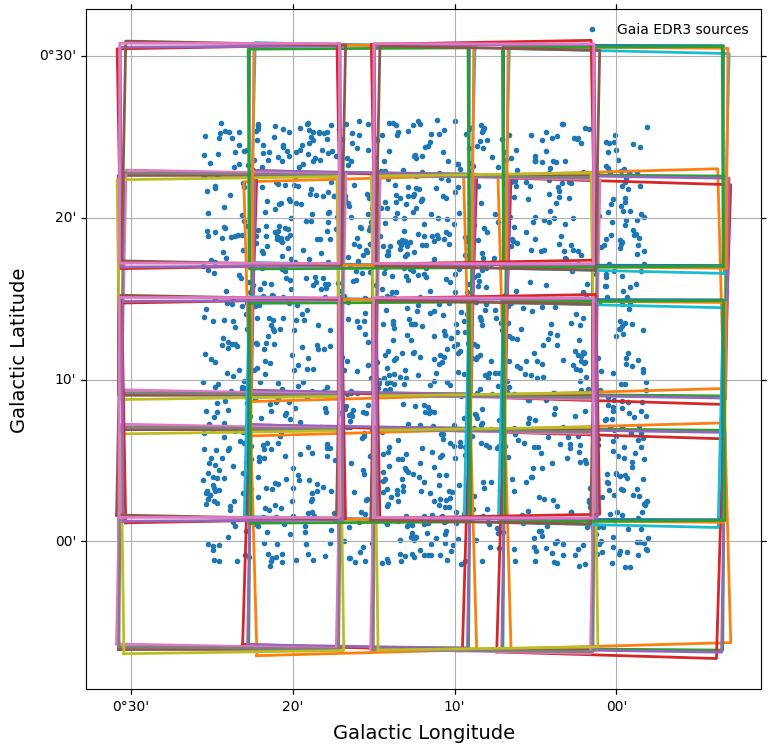

In [6]:
fig, ax = get_subplot(fov_center)

fov = [get_jasmine(SkyCoord(rec['ra'],rec['dec']), Angle(rec['pa'])) for rec in pointing]
display_sources(ax, catalog, marker='.', title='Gaia EDR3 sources')

for n,tel in enumerate(fov):
    tel.overlay_footprints(ax, color=f'C{n+1}', lw=2)
ax.legend(loc='upper right', frameon=False)
plt.show()

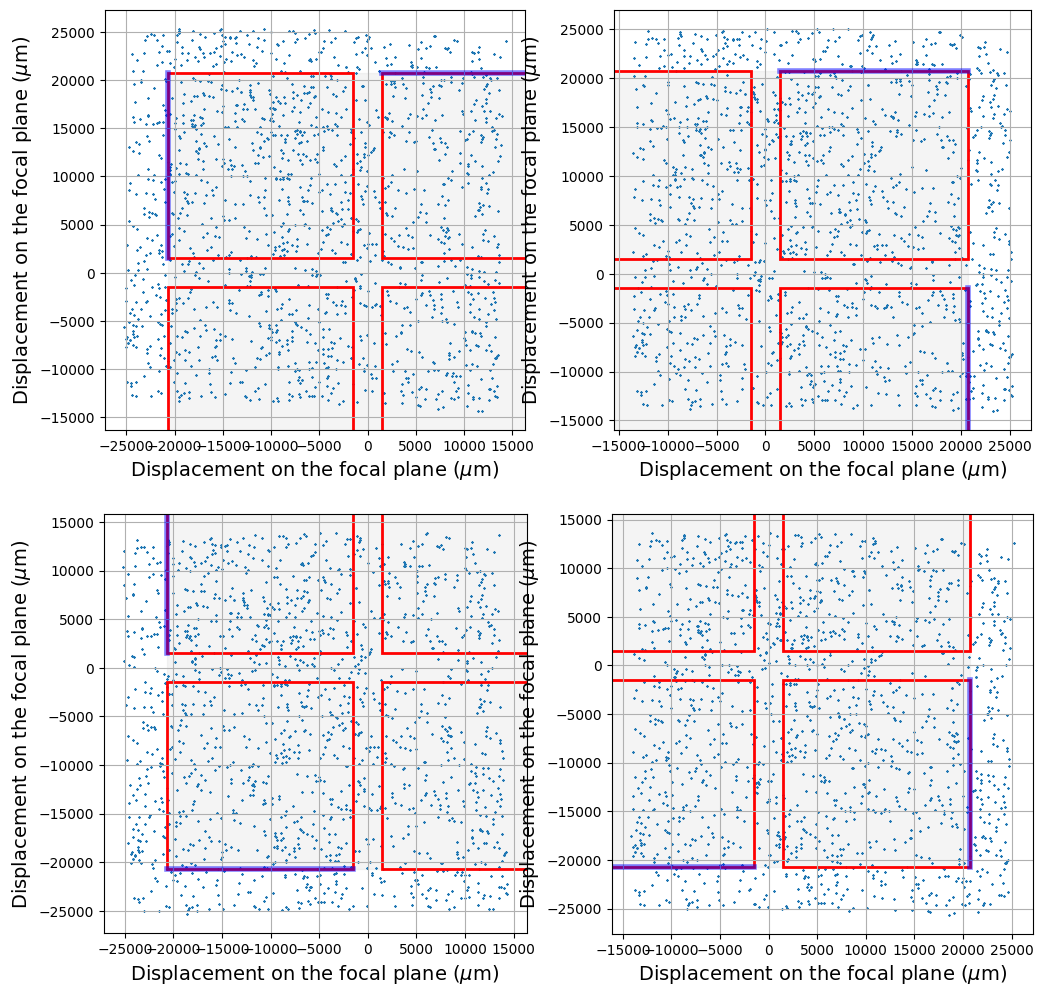

In [7]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(2,2).flatten()
for n,ax in enumerate(axes):
    fov[4*n].display_focal_plane(ax, source=catalog)